# Introduction
This normalises and linear & vertical values and provides various comparisons between them

## Setup

In [140]:
from music21 import *
import os
import csv
import itertools as it
import statistics
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from IPython.display import Image
import math
import statsmodels.api as sm

In [141]:
metadata_url = 'https://raw.githubusercontent.com/anonymousmuso/Viennese-Trichord/main/Data/Metadata.csv'
metadata = pd.read_csv(metadata_url, error_bad_lines=False, index_col='Title')
verticalities_url_pf = 'https://raw.githubusercontent.com/anonymousmuso/Viennese-Trichord/main/Data/Verticalities%20-%20Prime%20Form.csv'
verticalities_pf = pd.read_csv(verticalities_url_pf, error_bad_lines=False)
linear_units_pf_url = 'https://raw.githubusercontent.com/anonymousmuso/Viennese-Trichord/main/Data/Linear%20Harmonies%20-%20Prime%20Form.csv'
linear_units_pf = pd.read_csv(linear_units_pf_url, error_bad_lines=False)
verticalities_pf = verticalities_pf.set_index('Title').iloc[:, 11:12]
linear_units_pf = linear_units_pf.iloc[:, 11:12].drop('Total')


In [142]:
## this normalises the vertical and linear values for comparison

list_of_titles = []
for i in verticalities_pf.index.values:
    list_of_titles.append(i)
list_of_values = []
for j in list_of_titles:
    temp = [j]
    for k in range(0, len(verticalities_pf.index)):
        if verticalities_pf.iloc[k:k+1].index.values == j:
            temp.append(float(verticalities_pf.iloc[k:k+1, :].values))
    for l in range(0, len(linear_units_pf)):
        if linear_units_pf.iloc[l:l+1].index.values == j:
            temp.append(float(linear_units_pf.iloc[l:l+1, :].values))
    list_of_values.append(temp)
    
new_df = pd.DataFrame(list_of_values, columns = ['Title', 'Vertical Value', 'Linear Value']).set_index('Title')


list_of_normalised_vertical_values = []
temp_df = new_df["Vertical Value"].values
for j in temp_df:
    normalised_value = (j-min(temp_df))/(max(temp_df)-min(temp_df))
    list_of_normalised_vertical_values.append(normalised_value)
    
list_of_normalised_linear_values = []
temp_df = new_df["Linear Value"].values
for j in temp_df:
    normalised_value = (j-min(temp_df))/(max(temp_df)-min(temp_df))
    list_of_normalised_linear_values.append(normalised_value)
    
new_df['Vertical Normalised Total'] = list_of_normalised_vertical_values
new_df['Linear Normalised Total'] = list_of_normalised_linear_values
linear_df = new_df.transpose().drop(['Vertical Value', 'Linear Value']).transpose()


vertical_total = linear_df["Vertical Normalised Total"].values
linear_total = linear_df["Linear Normalised Total"].values

combined_total = []
vertical_higher_pf = []
linear_higher_pf = []
the_same_pf = []
for i in range(0, len(vertical_total)):
    vertical_value = float(vertical_total[i])
    linear_value = float(linear_total[i])
    combined_value = vertical_value+linear_value
    combined_total.append(combined_value)
    if vertical_value > linear_value:
        vertical_higher_pf.append(list_of_titles[i])
    if linear_value > vertical_value:
        linear_higher_pf.append(list_of_titles[i])
    if linear_value == vertical_value:
        the_same_pf.append(list_of_titles[i])

linear_df["Combined Normalised Total"] = combined_total
linear_df = linear_df.sort_values(by = 'Combined Normalised Total')
linear_df

,Vertical Normalised Total,Linear Normalised Total,Combined Normalised Total
Title,,,
Op. 11 iii,0.000000,0.000000,0.000000
Op. 31 iv,0.000000,0.000000,0.000000
Op. 6 vi,0.000000,0.022464,0.022464
Op. 6 v,0.000000,0.034637,0.034637
Op. 26,0.038986,0.007488,0.046474
...,...,...,...
Op. 20 i,0.887852,0.254297,1.142149
Op. 16 i,0.820505,0.339416,1.159921
Op. 27 ii,0.883621,0.290625,1.174246


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



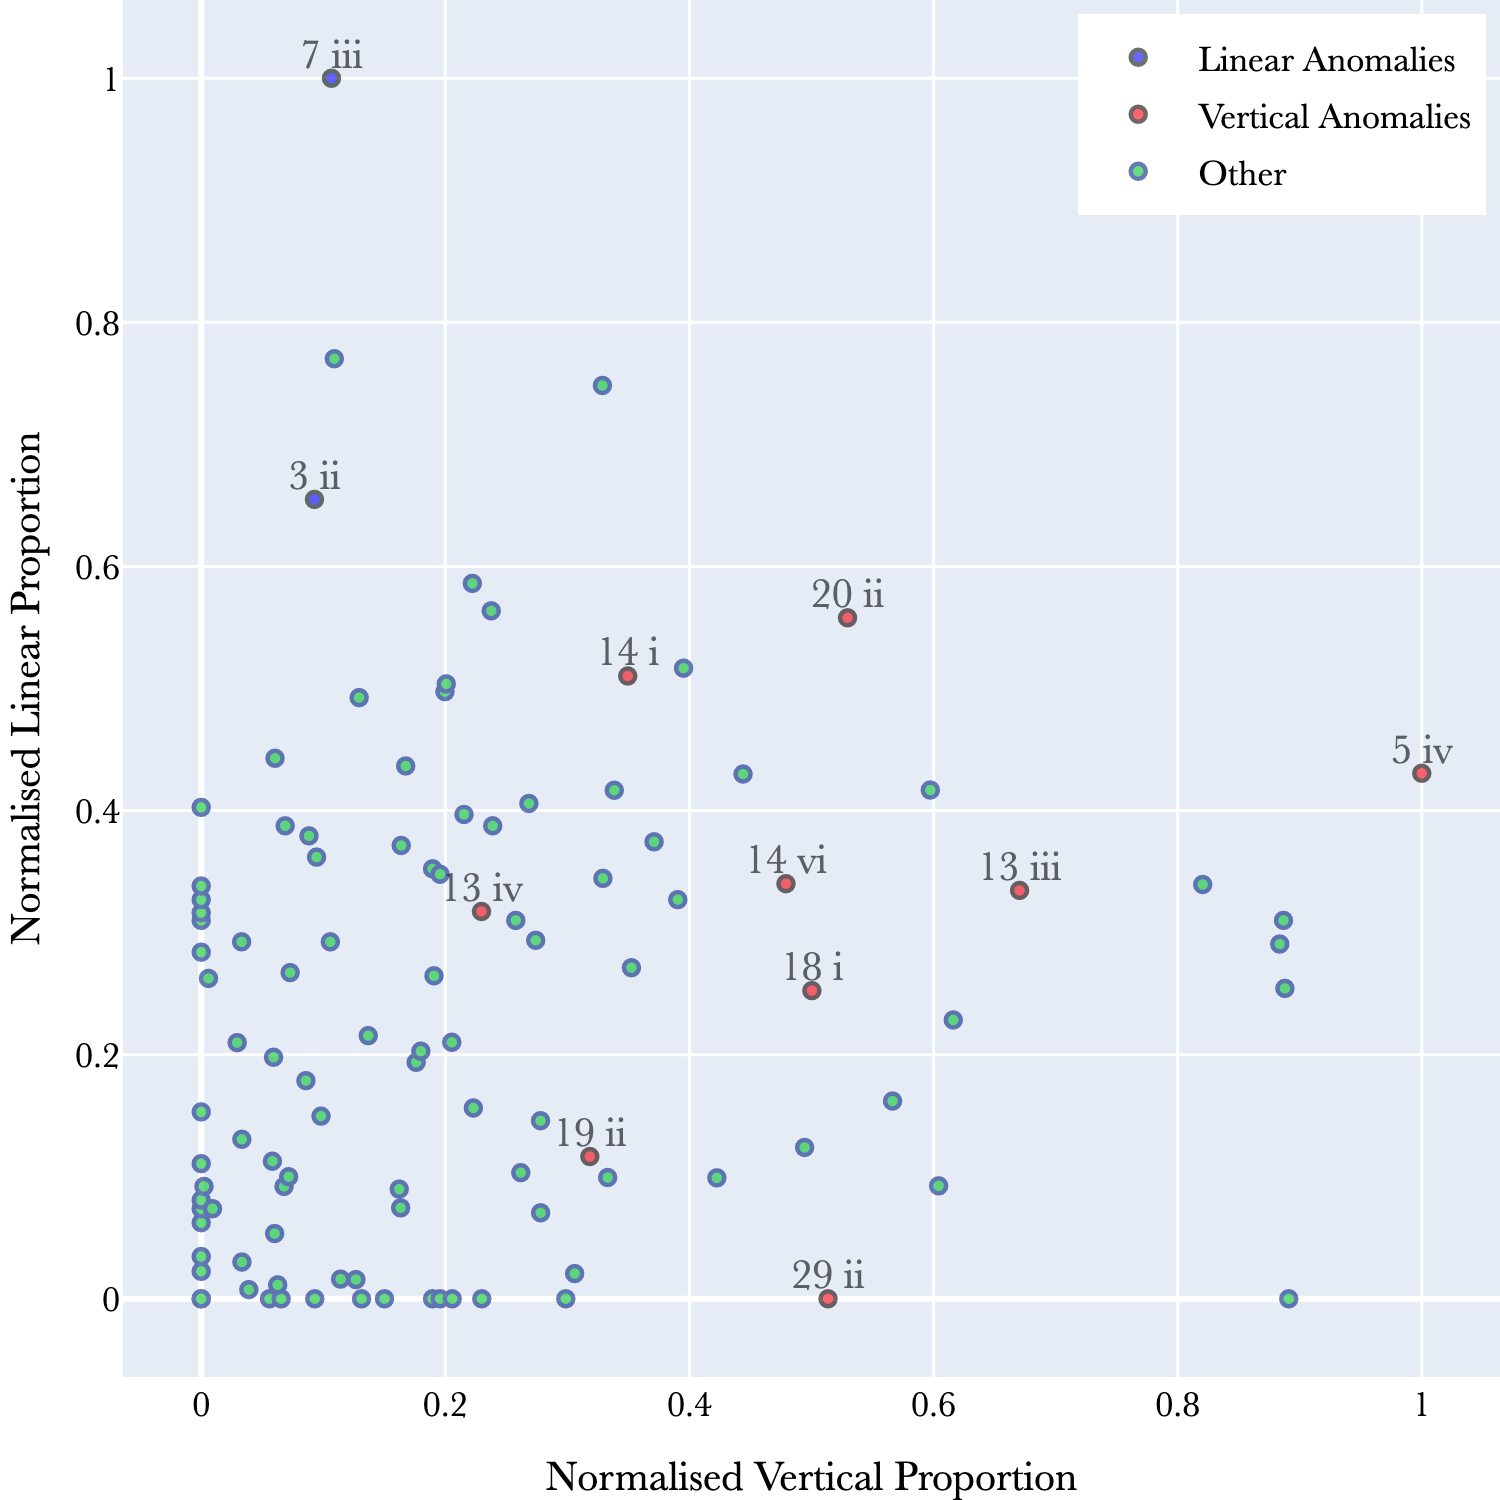

In [143]:
## this plots the normalised values

graph_df = linear_df
linear_anomaly_titles = [['Op. 3 ii'], ['Op. 7 iii']]
linear_anomalies = []
for i in range(0, len(graph_df.index.values)-1):
    temp_df = graph_df.iloc[i:i+1, :]
    for j in linear_anomaly_titles:
        if j == temp_df.index.values:
            list_of_values = []
            for k in temp_df.index.values:
                list_of_values.append(str(k.replace("Op. ", "")))
            for l in temp_df.values.flat:
                list_of_values.append(l)
            linear_anomalies.append(list_of_values)
            graph_df = graph_df.drop(temp_df.index.values)
linear_anomalies_df = pd.DataFrame(linear_anomalies, columns = ['Title', 'Vertical Normalised Total', 'Linear Normalised Total', 'Combined Normalised Total'])
linear_anomalies_df = linear_anomalies_df.set_index('Title')

vertical_anomaly_titles = [['Op. 5 iv'], ['Op. 12/ii'], ['Op. 13 iii'], ['Op. 13 iv'], ['Op. 14 i'], ['Op. 14 iii'], ['Op. 14 vi'], ['Op. 15 ii'], ['Op. 18 i'], ['Op. 18 iii'], ['Op. 19 ii'], ['Op. 20 i'], ['Op. 20 ii'], ['Op. 29 ii']]
vertical_anomalies = []
for i in range(0, len(graph_df.index.values)-1):
    temp_df = graph_df.iloc[i:i+1, :]
    for j in vertical_anomaly_titles:
        if j == temp_df.index.values:
            list_of_values = []
            for k in temp_df.index.values:
                list_of_values.append(str(k.replace("Op. ", "")))
            for l in temp_df.values.flat:
                list_of_values.append(l)
            vertical_anomalies.append(list_of_values)
            graph_df = graph_df.drop(temp_df.index.values)
vertical_anomalies_df = pd.DataFrame(vertical_anomalies, columns = ['Title', 'Vertical Normalised Total', 'Linear Normalised Total', 'Combined Normalised Total'])
vertical_anomalies_df = vertical_anomalies_df.set_index('Title')

fig = go.Figure()
fig.add_trace(go.Scatter(x = linear_anomalies_df['Vertical Normalised Total'], y = linear_anomalies_df['Linear Normalised Total'], mode='markers', text=linear_anomalies_df.index.values, textposition="top center", textfont_size=14, marker_color='rgb(3,3,255)', marker_line_color='rgb(9,19,6)', marker_line_width=1.5, opacity=0.6, name='Linear Anomalies'))
fig.add_trace(go.Scatter(x = linear_anomalies_df['Vertical Normalised Total'], y = linear_anomalies_df['Linear Normalised Total'], mode='text', text=linear_anomalies_df.index.values, textposition="top center", textfont_size=14, marker_color='rgb(3,3,255)', marker_line_color='rgb(9,19,6)', marker_line_width=1.5, opacity=0.6, name='Linear Anomalies', showlegend= False))

fig.add_trace(go.Scatter(x = vertical_anomalies_df['Vertical Normalised Total'], y = vertical_anomalies_df['Linear Normalised Total'], mode='markers', text=vertical_anomalies_df.index.values, textposition="top center", textfont_size=14, marker_color='rgb(255,0,13)', marker_line_color='rgb(19,0,0)', marker_line_width=1.5, opacity=0.6, name='Vertical Anomalies'))
fig.add_trace(go.Scatter(x = vertical_anomalies_df['Vertical Normalised Total'], y = vertical_anomalies_df['Linear Normalised Total'], mode='text', text=vertical_anomalies_df.index.values, textposition="top center", textfont_size=14, marker_color='rgb(255,0,13)', marker_line_color='rgb(19,0,0)', marker_line_width=1.5, opacity=0.6, name='Vertical Anomalies', showlegend= False))

fig.add_trace(go.Scatter(x = graph_df['Vertical Normalised Total'], y = graph_df['Linear Normalised Total'], mode='markers', text=graph_df.index.values, textposition="top center", textfont_size=14, marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6, name='Other'))
fig.update_layout(xaxis=(dict(title={'text': 'Normalised Vertical Proportion'})))
fig.update_layout(yaxis=(dict(title={'text': 'Normalised Linear Proportion'})))
fig.update_traces(marker_size=5, selector=dict(type='scatter')) 
#fig.update_layout(title={'text': 'Comparative Proportions Chart', 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(autosize=False, width=500, height=500)
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99))
fig.show()
img_bytes = fig.to_image(format="png", width=500, height=500, scale=3)
Image(img_bytes)

In [144]:
combined_values = linear_df

In [145]:
## this returns some comparative statistics

print('Vertical median:', np.median(combined_values['Vertical Normalised Total'].values.flat))
print('Linear median:', np.median(combined_values['Linear Normalised Total'].values.flat))

print('Linear higher in', len(linear_higher_pf), 'movements (',len(linear_higher_pf)/107*100,'% )')
print('Vertical higher in', len(vertical_higher_pf), 'movements (',len(vertical_higher_pf)/107*100,'% )')
print('Equal in', len(the_same_pf), 'movements (',len(the_same_pf)/107*100,'%)')

Vertical median: 0.17609522640814823
Linear median: 0.21558752997601915
Linear higher in 61 movements ( 57.009345794392516 % )
Vertical higher in 44 movements ( 41.1214953271028 % )
Equal in 2 movements ( 1.8691588785046727 %)


In [146]:
## this shows the movements ordered by combined normalised total

difference_values_list = []
for i in range(0, len(combined_values.index.values)):
    temp_df = combined_values.iloc[i:i+1, 0:2]
    difference_value = max(temp_df.values.flat)-min(temp_df.values.flat)
    difference_values_list.append(difference_value)
combined_values['Difference Value'] = difference_values_list
combined_values

,Vertical Normalised Total,Linear Normalised Total,Combined Normalised Total,Difference Value
Title,,,,
Op. 11 iii,0.000000,0.000000,0.000000,0.000000
Op. 31 iv,0.000000,0.000000,0.000000,0.000000
Op. 6 vi,0.000000,0.022464,0.022464,0.022464
Op. 6 v,0.000000,0.034637,0.034637,0.034637
Op. 26,0.038986,0.007488,0.046474,0.031498
...,...,...,...,...
Op. 20 i,0.887852,0.254297,1.142149,0.633555
Op. 16 i,0.820505,0.339416,1.159921,0.481089
Op. 27 ii,0.883621,0.290625,1.174246,0.592996


In [147]:
combined_values = combined_values.sort_values(by='Difference Value')
chronological_position = []
for i in range(0, len(combined_values.index.values)):
    temp_df = combined_values.iloc[i:i+1, :]
    title = temp_df.index
    for j in range(0, len(metadata.index.values)):
        if metadata.iloc[j:j+1].index == title:
            chronological_position.append(float(metadata.iloc[j:j+1, 8:].values[0]))
combined_values['Chronological Position'] = chronological_position

In [148]:
## provides some correlations with other pertinent variables

corr = combined_values.corr(method='spearman')
corr

,Vertical Normalised Total,Linear Normalised Total,Combined Normalised Total,Difference Value,Chronological Position
Vertical Normalised Total,1.000000,0.247657,0.778407,0.304186,0.230277
Linear Normalised Total,0.247657,1.000000,0.759975,0.350984,-0.214040
Combined Normalised Total,0.778407,0.759975,1.000000,0.534256,-0.002410
Difference Value,0.304186,0.350984,0.534256,1.000000,-0.018104
Chronological Position,0.230277,-0.214040,-0.002410,-0.018104,1.000000


In [149]:
## this calculates the median normalized combined values of the pre-dodecaphonic and dodecaphonic music

combined_values = combined_values.sort_values(by='Chronological Position')
linear_df_part_two = combined_values.iloc[65:, :].transpose().drop(columns=['Op. 16 v', 'Op. 16 i']).transpose()
linear_df_part_one = combined_values.iloc[:68, :].transpose().drop(columns=['Op. 17 i']).transpose()

print("Pre-Dodecaphonic Median:", statistics.median(linear_df_part_one['Difference Value'].values.flat))
print("Dodecaphonic Median:", statistics.median(linear_df_part_two['Difference Value'].values.flat))

Pre-Dodecaphonic Median: 0.1804934644266683
Dodecaphonic Median: 0.13171946480907254
